<a href="https://colab.research.google.com/github/parhamalikhan/house-price/blob/main/test1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd


data_path = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/"

train_df = pd.read_csv(data_path + "train.csv")
test_df = pd.read_csv(data_path + "test.csv")
submission_df = pd.read_csv(data_path + "sample_submission.csv")

print(train_df.head(10))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
missing_values = train_df.isnull().sum()
print(missing_values)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [28]:
missing_values = missing_values[missing_values > 0]
print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [29]:
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [30]:
#filling missing value
#find best way among median,mean,mode
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = train_df.select_dtypes(include=["float64", "int64"]).columns
skewness = train_df[numerical_cols].skew()

print(skewness)


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [31]:
missing_numerical = train_df.select_dtypes(include=["float64", "int64"]).isnull().sum()
print(missing_numerical)


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [32]:
missing_numerical = train_df.select_dtypes(include=["float64", "int64"]).isnull().sum()
missing_numerical = missing_numerical[missing_numerical > 0]
print(missing_numerical)


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


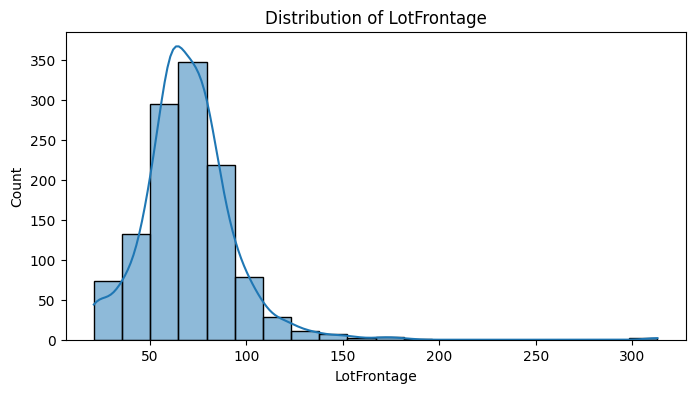

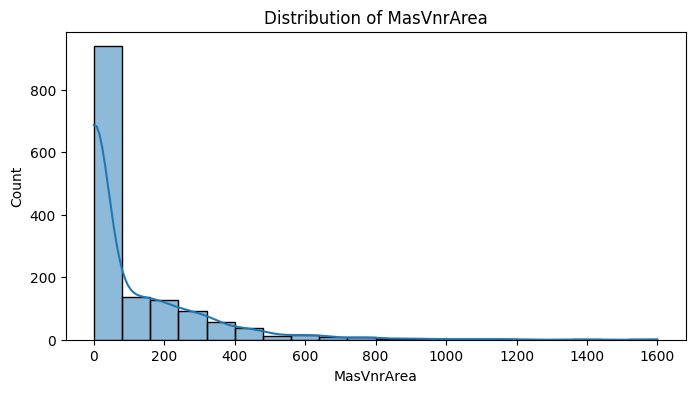

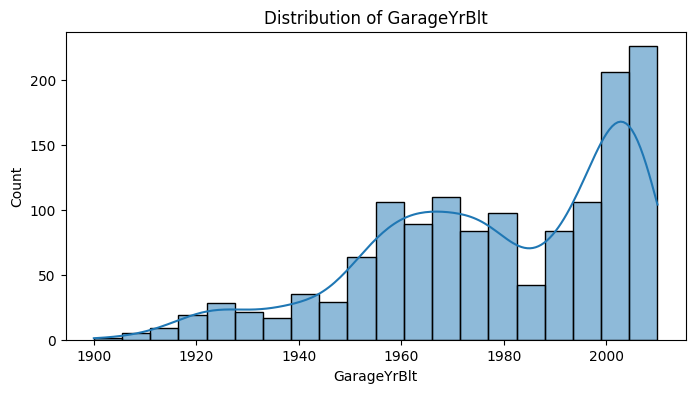

LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64


In [33]:
missing_cols = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for col in missing_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


print(train_df[missing_cols].skew())



In [34]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mode()[0])


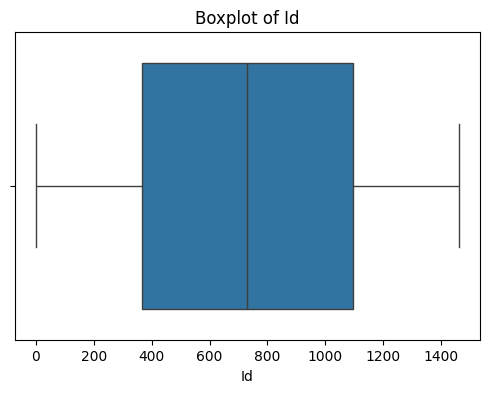

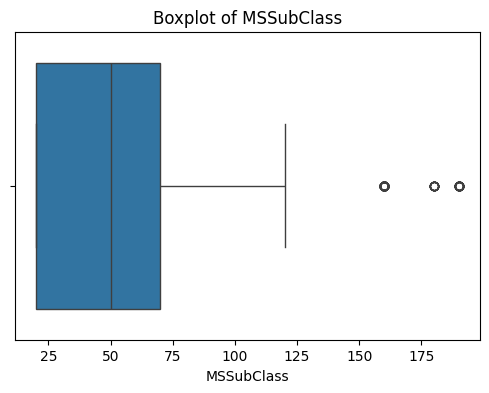

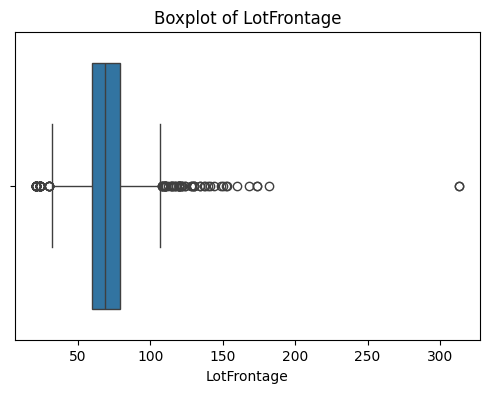

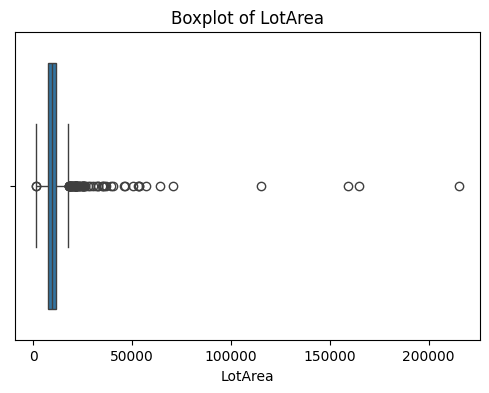

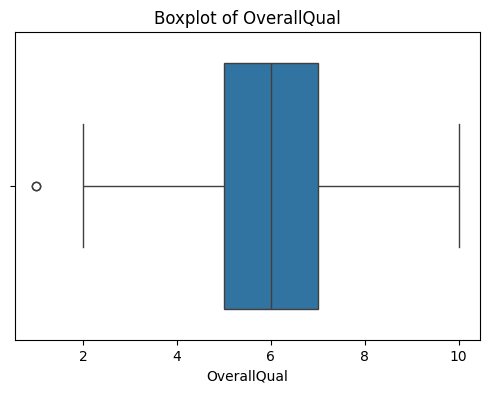

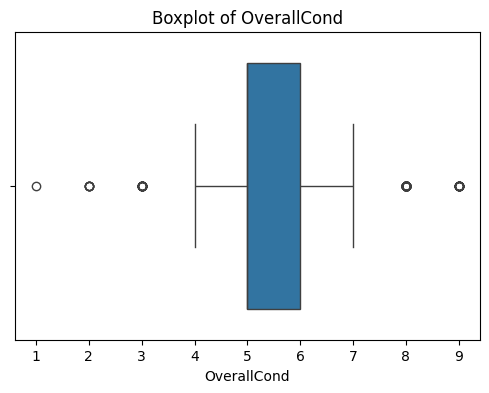

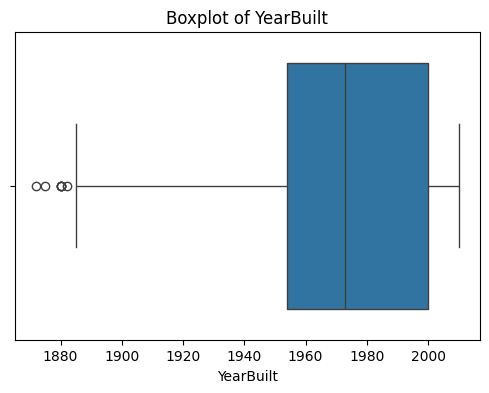

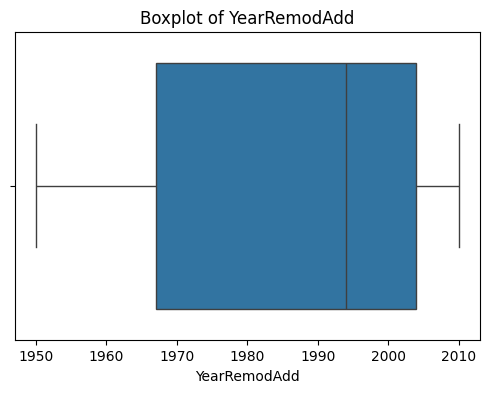

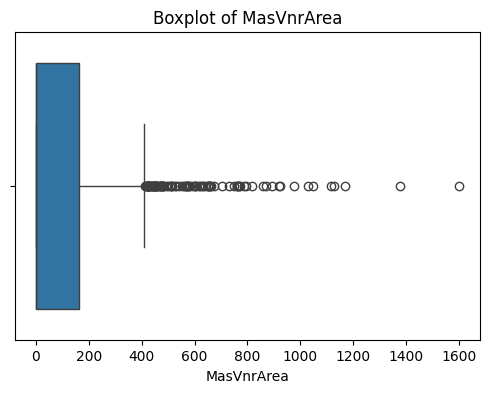

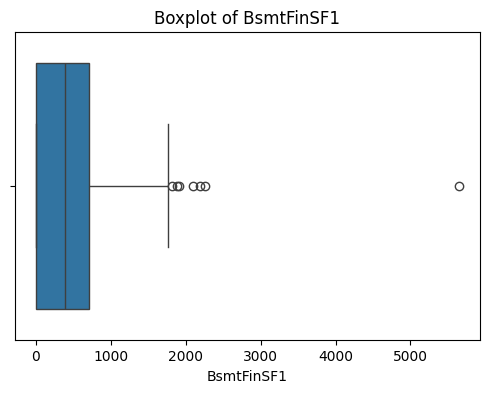

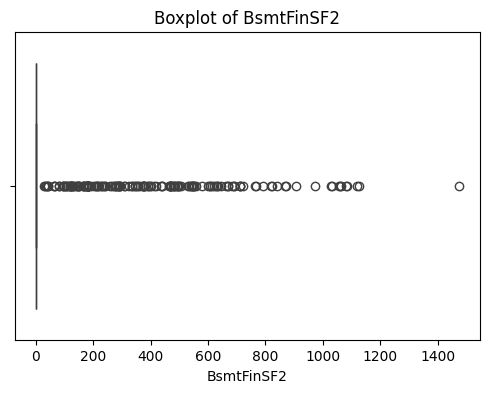

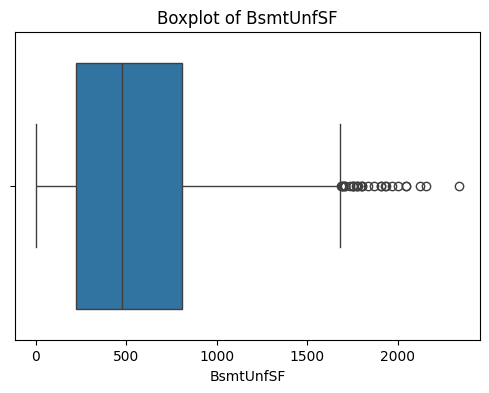

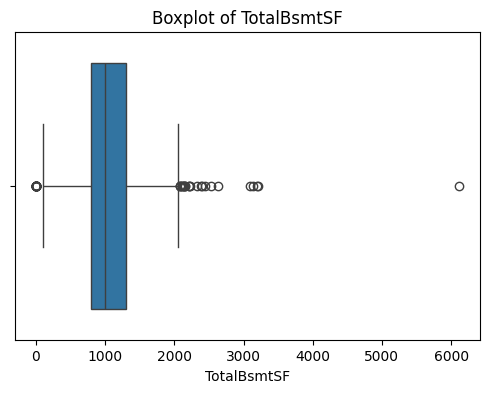

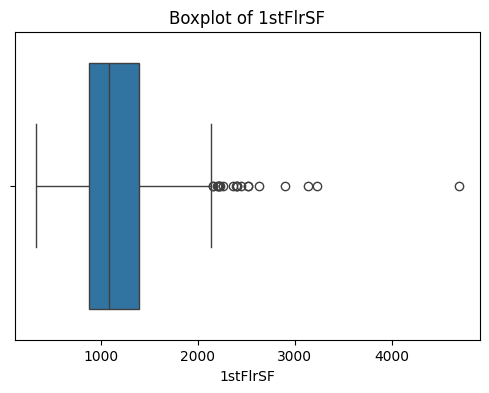

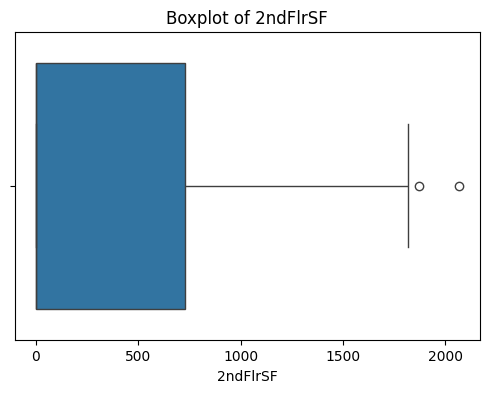

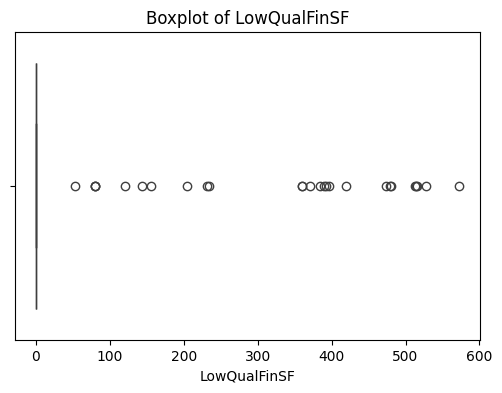

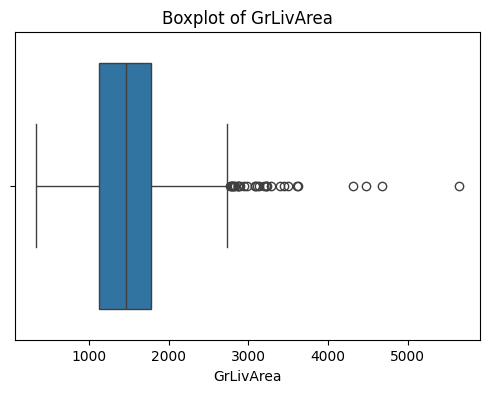

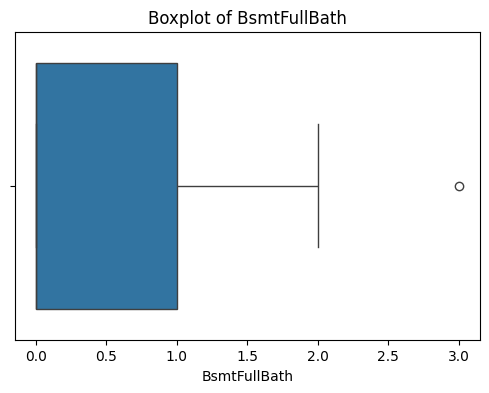

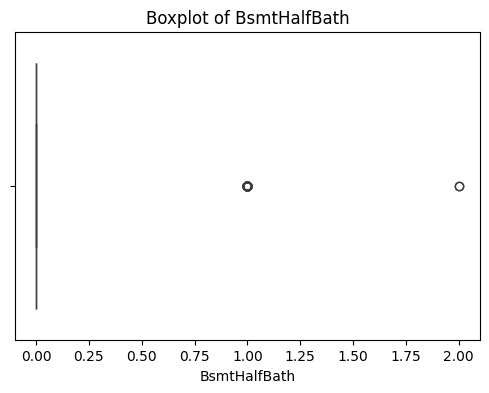

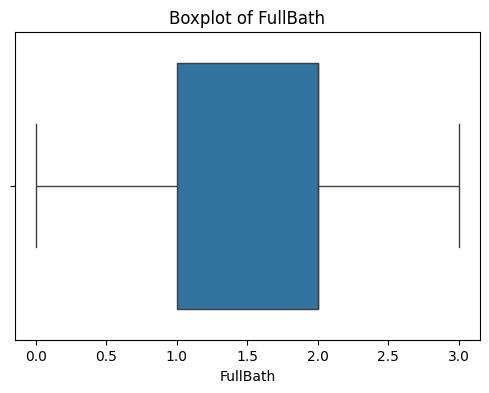

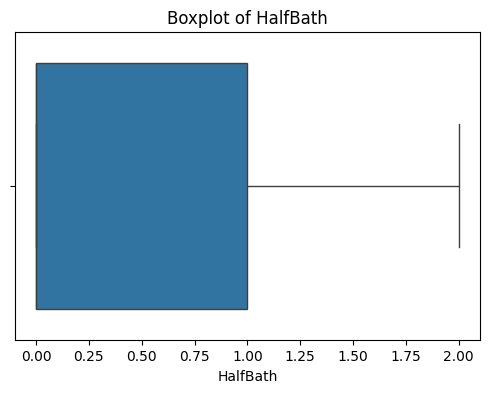

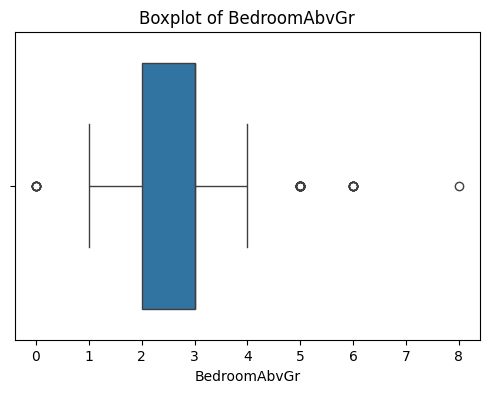

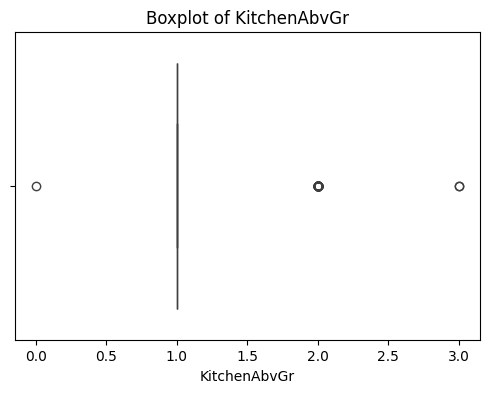

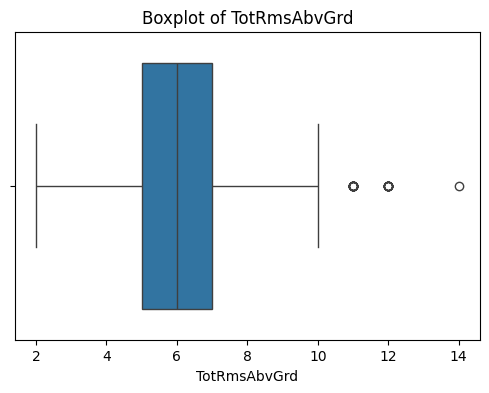

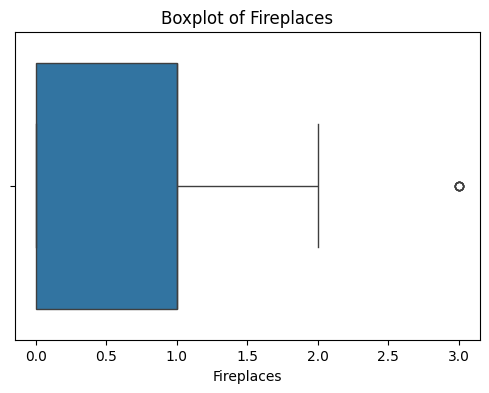

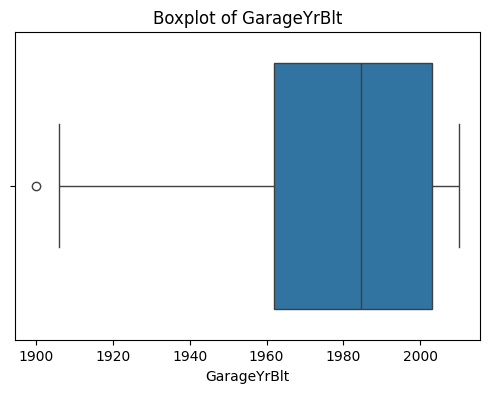

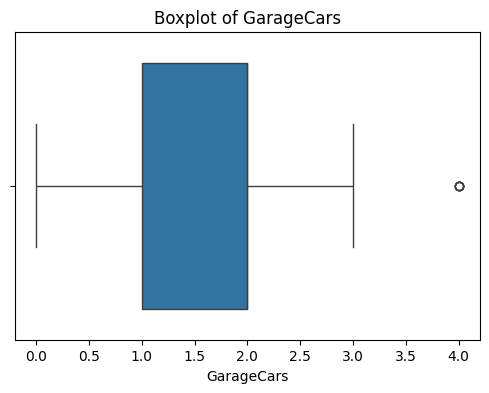

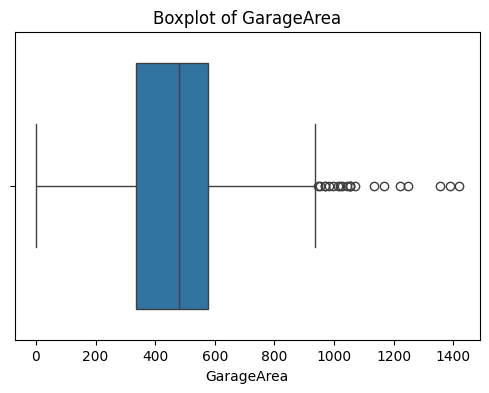

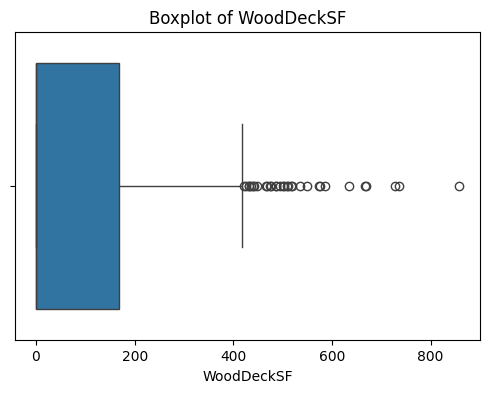

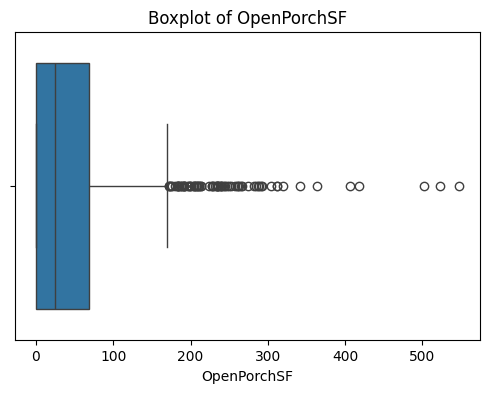

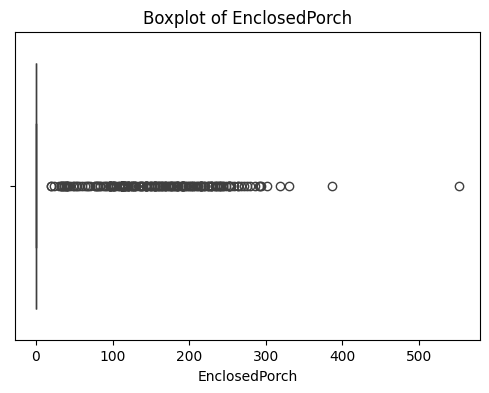

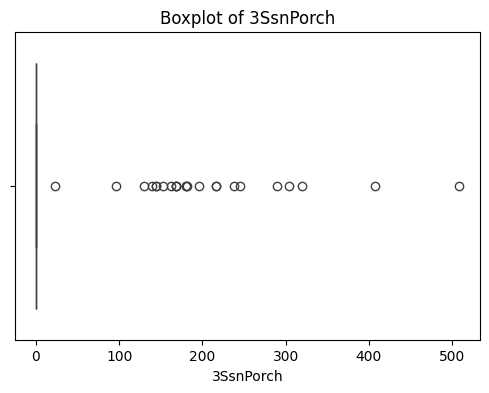

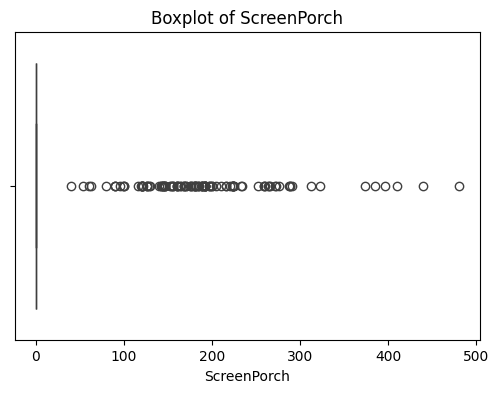

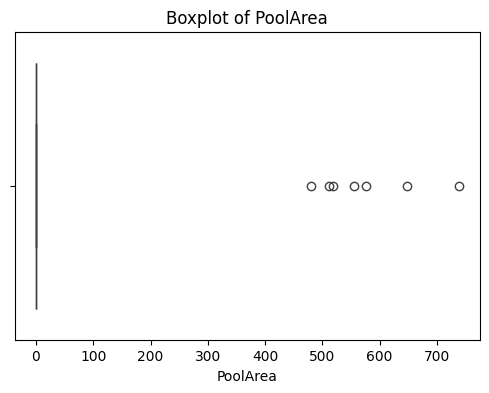

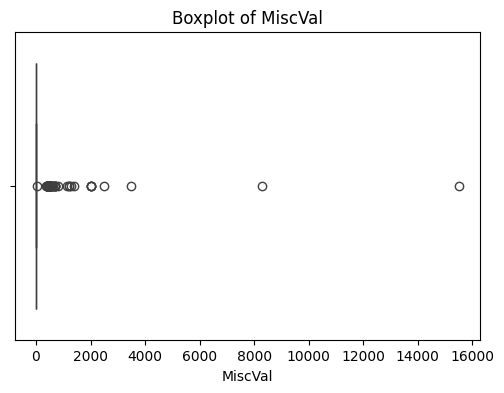

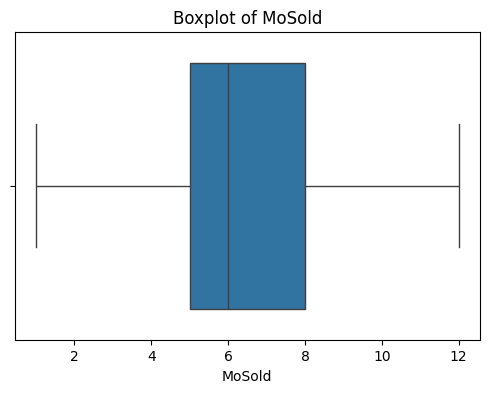

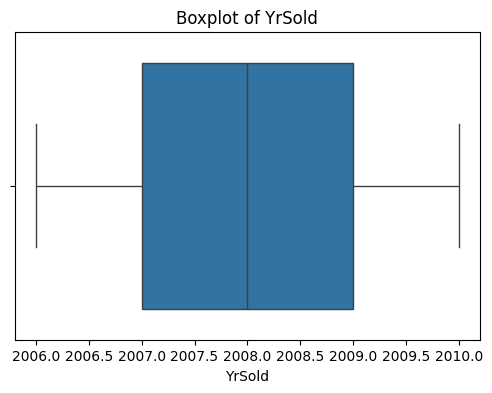

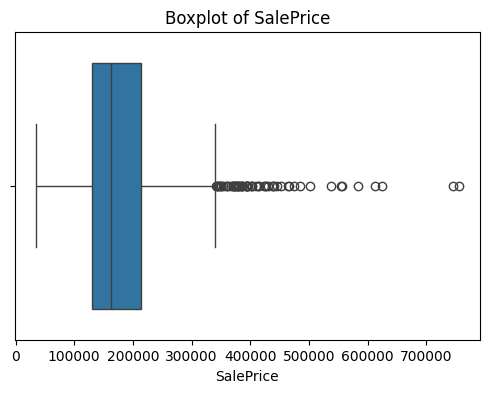

In [35]:
numerical_cols = train_df.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [36]:
Q1 = train_df[numerical_cols].quantile(0.25)
Q3 = train_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

outliers = ((train_df[numerical_cols] < outlier_lower) | (train_df[numerical_cols] > outlier_upper))


print(outliers.sum())


Id                 0
MSSubClass       103
LotFrontage      106
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        98
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        1
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64


In [37]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print(missing_values)


Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [38]:
none_columns = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature",
                "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for col in none_columns:
    train_df[col] = train_df[col].fillna("None")

mode_columns = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure",
                "BsmtFinType1", "BsmtFinType2", "Electrical"]

for col in mode_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

print(train_df.isnull().sum().sum())  # Should return 0


0


In [39]:
print(train_df.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [40]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['MSSubClass', 'OverallCond', 'YrSold']
label_encoder = LabelEncoder()

for col in label_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])

print(train_df[label_cols].head())


   MSSubClass  OverallCond  YrSold
0           5            4       2
1           0            7       1
2           5            4       2
3           6            4       0
4           5            4       2


In [41]:
train_df = pd.get_dummies(train_df, columns=['MSZoning', 'SaleType', 'SaleCondition'], drop_first=True)

print(train_df.head())

   Id  MSSubClass  LotFrontage  LotArea Street Alley LotShape LandContour  \
0   1           5         65.0     8450   Pave  None      Reg         Lvl   
1   2           0         80.0     9600   Pave  None      Reg         Lvl   
2   3           5         68.0    11250   Pave  None      IR1         Lvl   
3   4           6         60.0     9550   Pave  None      IR1         Lvl   
4   5           5         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... SaleType_ConLI SaleType_ConLw SaleType_New  \
0    AllPub    Inside  ...          False          False        False   
1    AllPub       FR2  ...          False          False        False   
2    AllPub    Inside  ...          False          False        False   
3    AllPub    Corner  ...          False          False        False   
4    AllPub       FR2  ...          False          False        False   

  SaleType_Oth SaleType_WD SaleCondition_AdjLand  SaleCondition_Alloca  \
0        False        Tr

In [42]:
print(train_df.dtypes)
print(train_df.isnull().sum().sum())


Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
Street                    object
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 95, dtype: object
0


In [43]:
train_df = train_df.drop(columns=['Id'])


In [44]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(1168, 93) (292, 93)


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'Pave'

In [46]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [47]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(X_train.dtypes.unique())


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[dtype('int64') dtype('float64') dtype('bool')]


In [48]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


TypeError: got an unexpected keyword argument 'squared'

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # Import numpy for square root function

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Compute RMSE manually

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 934604.3839625618
Mean Squared Error (MSE): 891476579717.2574
Root Mean Squared Error (RMSE): 944180.3745668819


In [51]:
print(y_train.describe())


count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


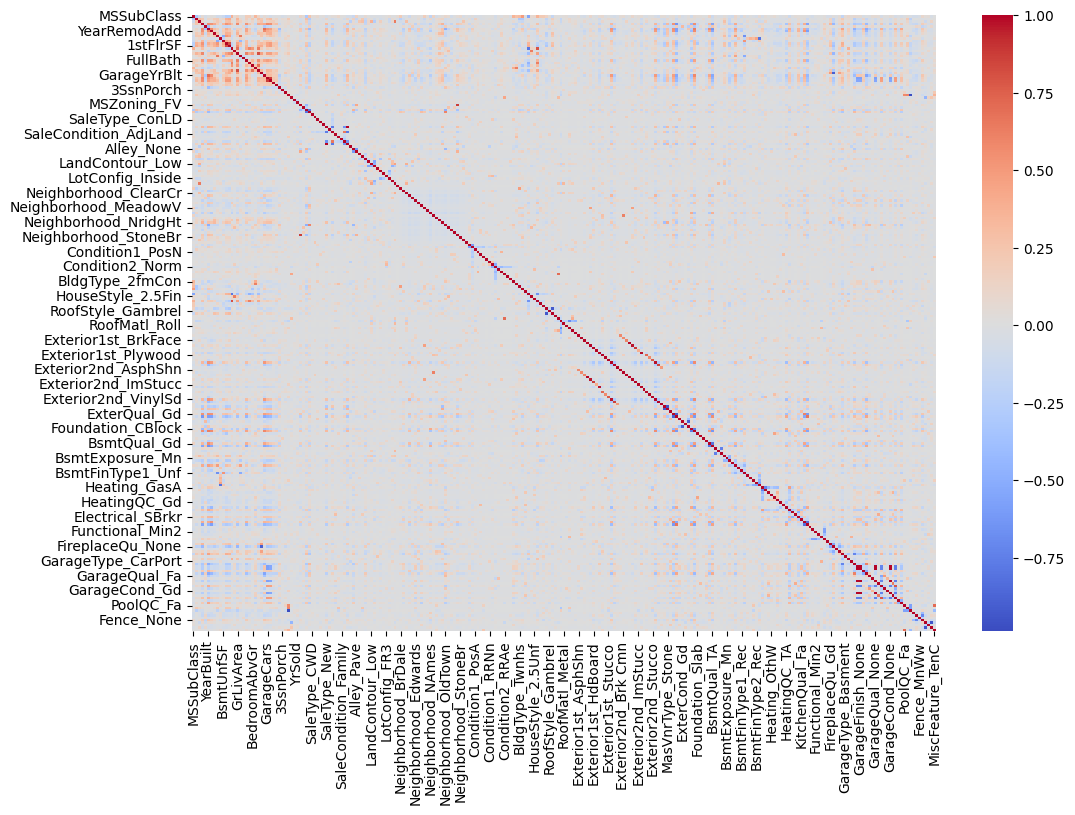

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)  # Check if squared=False is needed

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


TypeError: got an unexpected keyword argument 'squared'

In [57]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 17208.02192389354
Mean Squared Error (MSE): 776646988.4997059
Root Mean Squared Error (RMSE): 27868.386901643695
